In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.fftpack
import csv
import os

In [3]:
# list to store file lines
lines = []
# read file
with open(r"TA960-Nr1-220509-2.tcsv", 'r') as fp:
    # read an store all lines into list
    lines = fp.readlines()

# Write file
with open(r"Test.tcsv", 'w') as fp:
    # iterate each line
    for number, line in enumerate(lines):
        # delete line 5 and 8. or pass any Nth line you want to remove
        # note list index starts from 0
        if number not in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
            fp.write(line)

In [4]:
def rms(x):
    return np.sqrt(np.vdot(x, x)/x.size)
def mean(x):
    return np.mean(x)
def std_dev(x):
    return np.std(x)

Text(0.9, 0.9, 'rms: 1.65 \nmean: 1.65 \nstd: 0.02')

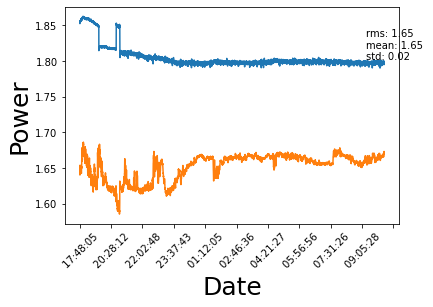

In [5]:
dataset = pd.read_csv('test.tcsv', sep=";",header = None)
accData=dataset.values.tolist()
#accData=np.asarray([np.asarray(elem) for elem in accData])
dataset['A'] = dataset[0] 
dataset['B'] = dataset[1] 
dataset['C'] = dataset[2] 
dataset['D'] = dataset[3]
C0 = np.array(dataset['A'])
C1 = np.array(dataset['B'])
C2 = np.array(dataset['C'])
C3 = np.array(dataset['D'])

#C6 = np.sqrt(np.sum((C3**2))/ C3.size);
#print(C6)
r = rms(C3);
m = mean((C3));
s = std_dev(C3);



figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] =  [12,7]
plt.xticks(rotation=45)
ax.plot(C1, C2)
ax.plot(C1, C3)
ax.set_xlabel(r'Date',fontsize=25)
ax.set_ylabel(r'Power',fontsize=25)
ax.set_xticks(np.arange(0, len(C1)+1, len(C1)/10));
plt.text(0.9,0.9,'rms: '+str(round(r,2))+' \nmean: '+str(round(m,2))+' \nstd: '+str(round(s,2)),horizontalalignment='left',
     verticalalignment='top', transform = ax.transAxes)

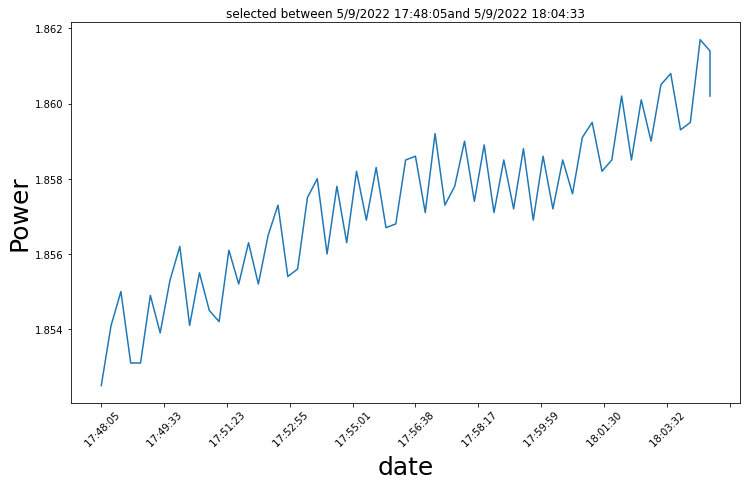

In [6]:
dataset['D'] = pd.to_datetime(dataset['A'] + ' ' + dataset['B'])

start_date = "5/9/2022 17:48:05" #Provide your start dateTime as input here in the same exact format
end_date = "5/9/2022 18:04:33" #Provide your end dateTime as input here in the same exact format

mask = (dataset['D'] >= start_date) & (dataset['D'] <= end_date)

selected_dataset = dataset.loc[mask]

C0_selected = np.array(selected_dataset['A'])
C1_selected = np.array(selected_dataset['B'])
C2_selected = np.array(selected_dataset['C'])
C3_selected = np.array(selected_dataset['D'])
figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] =  [12,7]
plt.xticks(rotation=45)
ax.plot(C1_selected,C2_selected)
ax.tick_params(labelsize=10)
ax.set_xlabel('date',fontsize=25)
ax.set_ylabel(r'Power',fontsize=25)
ax.set_xticks(np.arange(0, len(C1_selected)+1, len(C1_selected)/10));
ax.set_title('selected between '+start_date +'and '+ end_date);


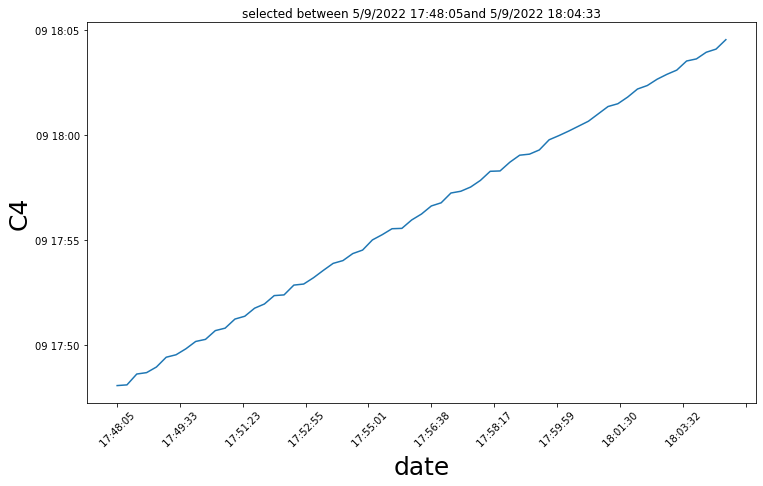

In [7]:
figure,ax=plt.subplots(1)

plt.rcParams['figure.figsize'] =  [12,7]
plt.xticks(rotation=45)

ax.plot(C1_selected,C3_selected)
ax.tick_params(labelsize=10)
ax.set_xlabel('date',fontsize=25)
ax.set_ylabel(r'C4',fontsize=25)
ax.set_xticks(np.arange(0, len(C1_selected)+1, len(C1_selected)/10));
ax.set_title('selected between '+start_date +'and '+ end_date);


In [8]:
os.remove('test.tcsv')

In [9]:
from datetime import datetime

ts = pd.Timestamp('2014-01-23 00:00:00', tz=None)
print(ts)
ts1 = pd.Timestamp('2014/01/23 00:00:00', tz=None)
print(ts1)
ts2 = pd.Timestamp(C0[0] + '' + C1[0], tz=None)
print(ts2)
ts3 = pd.Timestamp(C0[1] + '' + C1[1], tz=None)
print(ts3)
ts4 = pd.Timestamp(C0[2] + '' + C1[2], tz=None)
print(ts4)
timestamp = datetime.timestamp(ts)
print("timestamp =", timestamp)

timestamp = datetime.timestamp(ts1)
print("timestamp =", timestamp)

timestamp = datetime.timestamp(ts2)
print("timestamp =", timestamp)

timestamp = datetime.timestamp(ts3)
print("timestamp =", timestamp)

timestamp = datetime.timestamp(ts4)
print("timestamp =", timestamp)

dataset['DT'] = dataset[0] + '' + dataset[1]
#ts4 = pd.Timestamp(dataset['DT'] , tz=None)
ts5=pd.to_datetime(dataset['DT'])
list=[]
for i in range(ts5.size):
    timestamp2 = datetime.timestamp(ts5[i]);
    list.append(timestamp2);
df_final = pd.Series(list)

df_new=df_final-df_final[0];


2014-01-23 00:00:00
2014-01-23 00:00:00
2022-05-09 17:48:05
2022-05-09 17:48:07
2022-05-09 17:48:38
timestamp = 1390431600.0
timestamp = 1390431600.0
timestamp = 1652111285.0
timestamp = 1652111287.0
timestamp = 1652111318.0


Text(0.9, 0.9, 'rms: 1.65 \nmean: 1.65 \nstd: 0.02')

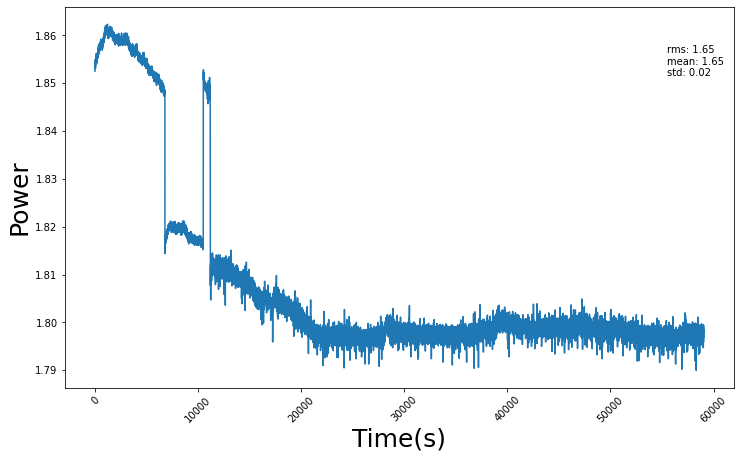

In [10]:
figure,ax=plt.subplots(1)
plt.xticks(rotation=45)
ax.plot(df_new, C2)
ax.set_xlabel(r'Time(s)',fontsize=25)
ax.set_ylabel(r'Power',fontsize=25)
plt.text(0.9,0.9,'rms: '+str(round(r,2))+' \nmean: '+str(round(m,2))+' \nstd: '+str(round(s,2)),horizontalalignment='left',
     verticalalignment='top', transform = ax.transAxes)

Text(0.9, 0.9, 'rms: 1.65 \nmean: 1.65 \nstd: 0.02')

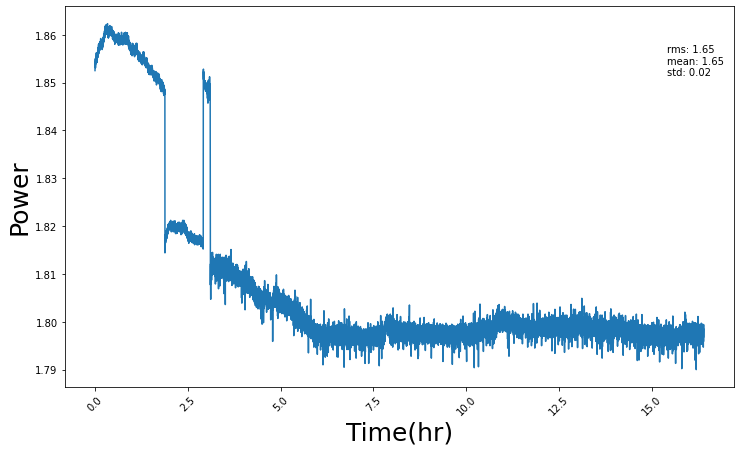

In [11]:
figure,ax=plt.subplots(1)
plt.xticks(rotation=45)
ax.plot((df_new)/(1*60*60), C2)
ax.set_xlabel(r'Time(hr)',fontsize=25)
ax.set_ylabel(r'Power',fontsize=25)
plt.text(0.9,0.9,'rms: '+str(round(r,2))+' \nmean: '+str(round(m,2))+' \nstd: '+str(round(s,2)),horizontalalignment='left',
     verticalalignment='top', transform = ax.transAxes)

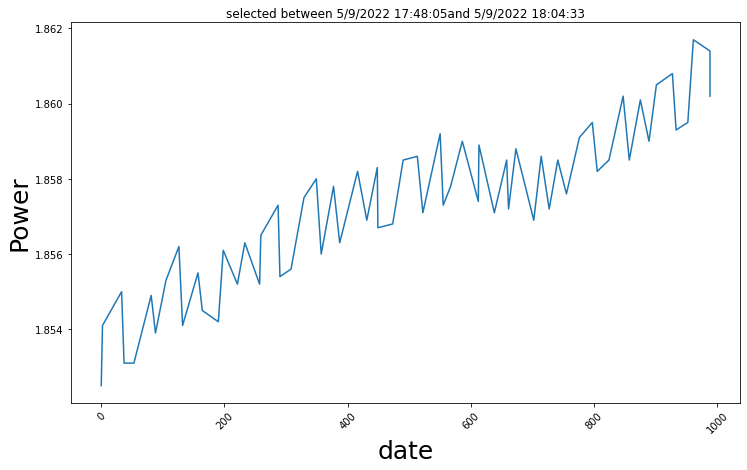

In [14]:
ts5_selected= dataset['DT'].loc[mask]
ts6=pd.to_datetime(ts5_selected)

list=[]
for i in range(ts6.size):
    timestamp2 = datetime.timestamp(ts6[i]);
    list.append(timestamp2);
df_final = pd.Series(list)

df_new=df_final-df_final[0];


figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] =  [12,7]
plt.xticks(rotation=45)
ax.plot(df_new,C2_selected)
ax.tick_params(labelsize=10)
ax.set_xlabel('time(s)',fontsize=25)
ax.set_ylabel(r'Power',fontsize=25)
#ax.set_xticks(np.arange(0, len(df_new)+1, len(df_new)/10));
ax.set_title('selected between '+start_date +'and '+ end_date);